## Convolution layer
Convolution Layers are made up of filters:
but what are these filters?

### Code Example
Let's go through one code example to understand "Filters" and "Convolution"

When the feature is present in part of an image, the convolution operation between the filter and that part of the image results in a real number with a high value. If the feature is not present, the resulting value is low.

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2

In [2]:
def drawImg(img,title="Image"):
    plt.imshow(img,cmap='gray')
    plt.axis("off")
    plt.style.use("seaborn")
    plt.title(title+str(img.shape))
    plt.show()

(100, 100, 3)
(100, 100)


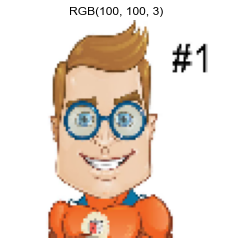

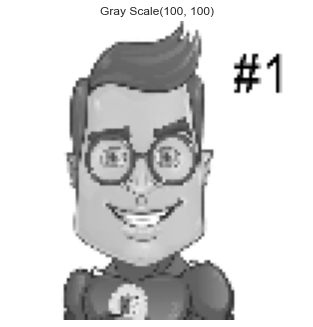

In [4]:
img_ = cv2.imread("./cody2.jpg")
img_ = cv2.resize(img_,(100,100))
print(img_.shape)
img = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_gray.shape)
drawImg(img,"RGB")
drawImg(img_gray,"Gray Scale")

In [5]:
def convolutionOld(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(1,W-1):
        for col in range(1,H-1):
            for i in range(F):
                for j in range(F):
                    new_img[row-1][col-1] += img[row-1+i][col-1+j]*img_filter[i][j]
                if new_img[row-1][col-1] > 255:
                    new_img[row-1][col-1] = 255
                elif new_img[row-1][col-1] < 0:
                    new_img[row-1][col-1] = 0
                    
    return new_img

In [6]:
def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                if new_img[row][col] > 255:
                    new_img[row][col] = 255
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0
                    
    return new_img

In [7]:
blur_filter = np.ones((3,3))/9.0
output1 = convolution(img_gray,blur_filter)

In [8]:
edge_filter = np.array([[1,0,-1],
                        [1,0,-1],
                        [1,0,-1]])
output2 = convolution(img_gray,edge_filter)

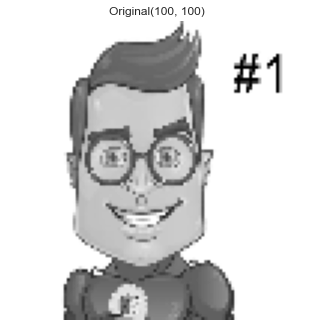

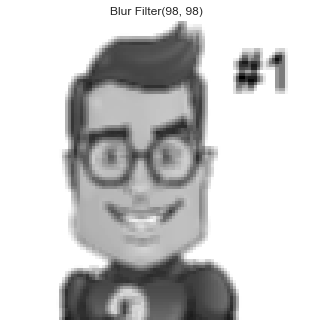

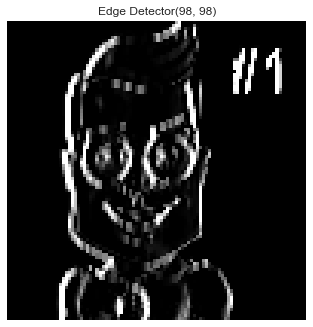

In [9]:
drawImg(img_gray,"Original")
drawImg(output1,"Blur Filter")
drawImg(output2,"Edge Detector")

In [10]:
# padding image
pad_img = np.pad(img, ((10,10), (10,10), (0,0)), 'constant', constant_values =200)

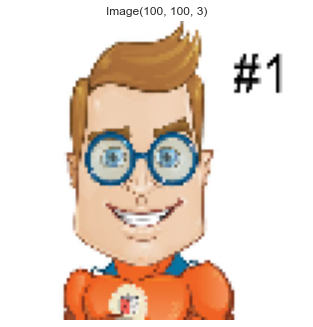

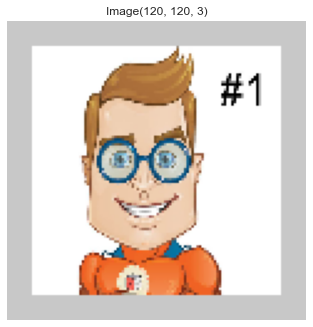

In [11]:
drawImg(img)
drawImg(pad_img)

In [12]:
# POOLING
X = np.array([[1,0,2,3],
              [4,6,6,8],
              [3,1,1,0],
              [1,2,2,4]])

X_pool_output = np.zeros((2,2))

H,W = X.shape
f = 2
stride = 2

#Zero Padding
HO = int((H-f)/stride) + 1
WO = int((W-f)/stride) + 1

for r in range(HO):
    for c in range(WO):
        r_start = r*stride
        r_end  = r_start + f
        c_start = c*stride
        c_end = c_start + f
        
        X_slice = X[r_start:r_end,c_start:c_end]
        X_pool_output[r][c] = np.max(X_slice)

print("X \n",X)
print("X after Pooling \n",X_pool_output)

X 
 [[1 0 2 3]
 [4 6 6 8]
 [3 1 1 0]
 [1 2 2 4]]
X after Pooling 
 [[6. 8.]
 [3. 4.]]
